In [1]:
import pandas as pd

In [2]:
news = pd.read_json('Dane/News_kaggle/News_Category_Dataset_v2.json', lines=True)

In [3]:
news.tail()

,category,headline,authors,link,short_description,date
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,2012-01-28


In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [5]:
news.describe()

<ipython-input-5-d644a336d14c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  news.describe()


,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.newre...,,2012-12-21 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [6]:
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [7]:
dates = news.date.value_counts()

Pogrupujmy daty po tych dla których jest więcej niż 50 wiadomości 

In [8]:
dates = pd.DataFrame(data=dates)

In [9]:
dates

,date
2012-12-21,100
2012-04-30,100
2014-01-27,100
2013-01-29,100
2012-06-28,100
...,...
2018-04-22,19
2018-03-10,18
2017-12-25,16
2018-04-15,15


In [10]:
dates.rename(columns={'date': 'news_amount'}, inplace=True)

In [11]:
news_amount = 50

In [12]:
dates = dates[dates['news_amount']>=news_amount]

In [13]:
dates.reset_index(inplace=True)

In [14]:
dates.rename(columns={'index': 'Date'}, inplace=True)

C:\Users\Bartek\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
dates

,Date,news_amount
0,2012-12-21,100
1,2012-04-30,100
2,2014-01-27,100
3,2013-01-29,100
4,2012-06-28,100
...,...,...
2213,2017-12-29,51
2214,2018-05-25,50
2215,2018-05-21,50
2216,2017-07-23,50


# Dane z giełdy

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [17]:
import os
DATA_PATH = "Dane/USA/SP_500.csv"

In [18]:
data_stock = pd.read_csv(DATA_PATH, sep=",")

In [19]:
data_stock.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


Zróbmy wykres kursu

In [20]:
import matplotlib.pyplot as plt

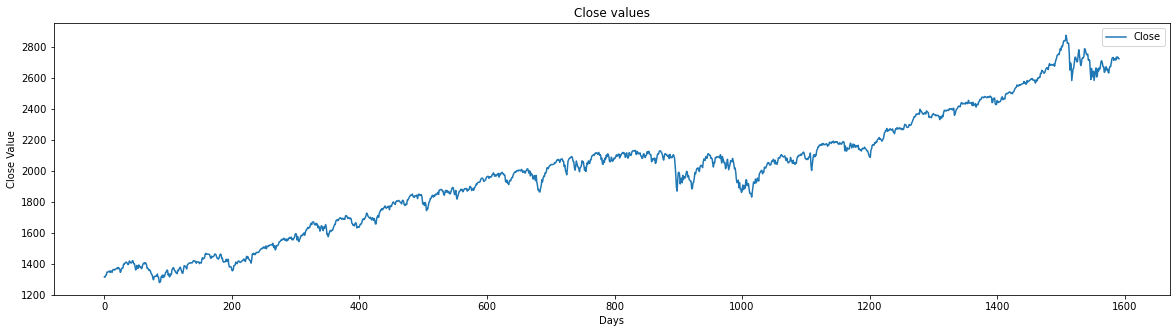

In [21]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'], label = 'Close')
# plt.plot(wig['VOL'], label = 'VOL')
# plt.ylim([0, ])
# plt.xlim([2000, 7000])
plt.ylabel('Close Value')
plt.xlabel('Days')
plt.title('Close values')
plt.legend()
plt.show()

Dodajmy do naszych danych giełdowych kolumnę wskazującą na to czy kurs wzrósł w danym dniu

In [22]:
#1 - wzrósł
#0 - zmalał
data_stock['Increased'] = data_stock['Close']-data_stock['Open']
data_stock['Increased'] = data_stock['Increased'].map(lambda diff: 1 if diff > 0 else 0)

In [23]:
data_stock.head()

,Date,Open,High,Low,Close,Volume,Increased
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333,0
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333,0
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222,1
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000,1
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556,1


In [24]:
data_stock.Increased.value_counts()

1    853
0    739
Name: Increased, dtype: int64

# Usuwanie zbędnych kolumn z data_stock

Usuńmy wszystkie kolumny poza *Date* oraz *Increased* gdyż będziemy chcieli przewidzieć czy kurs wzrośnie/zmaleje na podstawie wiadomości zatem dane z giełdy są już nam niepotrzebne

In [25]:
data_stock.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [26]:
data_stock.head()

,Date,Increased
0,2012-01-30,0
1,2012-01-31,0
2,2012-02-01,1
3,2012-02-02,1
4,2012-02-03,1


# Dodanie nagłówków wiadomości do danych z giełdy

Dla każdego dnia chcemy mieć 50 wiadomości

W przypadku mniejszej liczby wiadomości w danym dniu, wykasowujemy ten dzień z danych

Patrzymy więc, które dane wykasować, do tego celu używamy iloczynu zbiorów

In [27]:
dates.Date

0      2012-12-21
1      2012-04-30
2      2014-01-27
3      2013-01-29
4      2012-06-28
          ...    
2213   2017-12-29
2214   2018-05-25
2215   2018-05-21
2216   2017-07-23
2217   2017-06-24
Name: Date, Length: 2218, dtype: datetime64[ns]

In [28]:
idx1 = pd.Index(data_stock.Date.astype(str))

In [29]:
idx2 = pd.Index(dates.Date.astype(str))

In [30]:
dates_valid = idx1.intersection(idx2)

In [31]:
idx2

Index(['2012-12-21', '2012-04-30', '2014-01-27', '2013-01-29', '2012-06-28',
       '2012-05-18', '2012-03-14', '2012-05-16', '2014-02-11', '2013-07-11',
       ...
       '2017-08-26', '2017-06-25', '2017-04-16', '2017-08-06', '2016-12-24',
       '2017-12-29', '2018-05-25', '2018-05-21', '2017-07-23', '2017-06-24'],
      dtype='object', name='Date', length=2218)

In [32]:
idx1

Index(['2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02', '2012-02-03',
       '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10',
       ...
       '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
       '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25'],
      dtype='object', name='Date', length=1592)

In [33]:
dates_valid = pd.DataFrame(data=dates_valid)

In [34]:
dates_valid

,Date
0,2012-01-30
1,2012-01-31
2,2012-02-01
3,2012-02-02
4,2012-02-03
...,...
1585,2018-05-21
1586,2018-05-22
1587,2018-05-23
1588,2018-05-24


Dla wartości dates_valid będziemy dobierać wiadomości 

Dlatego usuńmy wiersze te wiersze w data_stock, które nie występują w dates_valid

In [35]:
data_stock['Date'] = data_stock['Date'].astype(str)

In [36]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1592 non-null   object
 1   Increased  1592 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.0+ KB


In [37]:
dates_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1590 non-null   object
dtypes: object(1)
memory usage: 12.5+ KB


In [38]:
data_stock = data_stock[data_stock['Date'].isin(dates_valid['Date'].values)]

In [39]:
data_stock

,Date,Increased
0,2012-01-30,0
1,2012-01-31,0
2,2012-02-01,1
3,2012-02-02,1
4,2012-02-03,1
...,...,...
1587,2018-05-21,0
1588,2018-05-22,0
1589,2018-05-23,1
1590,2018-05-24,0


Zachowaliśmy wiersze, dla których mamy 50 wiadomości

Dodajmy te wiadomości do naszego data_stock

Każdy nr wiadomości to oddzielna kolumna

Dlatego musimy dodać 50 kolumn

In [40]:
for i in range (1, news_amount+1):
    data_stock['News_no'+str(i)] = 'NaN'

In [41]:
data_stock

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no41,News_no42,News_no43,News_no44,News_no45,News_no46,News_no47,News_no48,News_no49,News_no50
0,2012-01-30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-02-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-02-02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-02-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,2018-05-21,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588,2018-05-22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,2018-05-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1590,2018-05-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Przykład dodania ręcznie jednego news'a**

In [42]:
np.array(news[news.date == '2018-05-25']['headline'])[0]

'North Korea Still Open To Talks After Trump Cancels Summit'

In [43]:
# data_stock[data_stock.Date == '2018-05-25']['News_no1'] = "j"   bad
data_stock.loc[data_stock.Date == '2018-05-25','News_no1'] = 'j'

In [44]:
data_stock.loc[data_stock.Date == '2018-05-25','News_no1'] = np.array(news[news.date == '2018-05-25']['headline'])[0]

In [45]:
data_stock.News_no1.value_counts()

NaN                                                           1589
North Korea Still Open To Talks After Trump Cancels Summit       1
Name: News_no1, dtype: int64

In [46]:
data_stock.tail()

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no41,News_no42,News_no43,News_no44,News_no45,News_no46,News_no47,News_no48,News_no49,News_no50
1587,2018-05-21,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588,2018-05-22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,2018-05-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1590,2018-05-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591,2018-05-25,0,North Korea Still Open To Talks After Trump Ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
news.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [48]:
#---------

**Automatyczne iterowanie po wierszach data_stock i dodawanie kolejnych newsów**

In [49]:
for i in range(1, news_amount+1):
    for index, row in data_stock.iterrows():
        date_row = row['Date']
        data_stock.loc[data_stock.Date == date_row,'News_no'+str(i)] = np.array(news[news.date == date_row]['headline'])[i-1]

In [50]:
data_stock.tail()

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no41,News_no42,News_no43,News_no44,News_no45,News_no46,News_no47,News_no48,News_no49,News_no50
1587,2018-05-21,0,Venezuela's Socialist Leader Nicolas Maduro Re...,Iran Says Europe's Support For Nuclear Deal Is...,Far-Right Mob Attacks 75-Year-Old Liberal Gree...,Shawn Mendes And Khalid Perform With Parkland ...,Tamir Rice's Mother Is Opening A Youth Center ...,Judge Orders Texas To Make Voter Registration ...,Kelly Clarkson Calls For 'Moments Of Action' I...,Kendrick Lamar Stops White Fan Rapping N-Word ...,...,John Oliver Has The Best Time Mocking The Roya...,John Oliver Needles The 'Dangerously Unregulat...,Jemele Hill Honored As NABJ's Journalist Of Th...,French Digital Minister Comes Out As Gay To Fi...,Belgian Transgender Ballet Drama Wins Big At C...,86-Year-Old Gay Man Proves You're Never Too Ol...,Super PACs That Meddled In West Virginia’s Sen...,Airline Passenger Arrested After Allegedly Har...,Mike Pompeo Promises To 'Crush' Iran And Achie...,8 Majestic Islands In Europe That Most Tourist...
1588,2018-05-22,0,Australian Archbishop Convicted Of Covering Up...,Commander Says Iran’s People Will Respond To P...,Mark Zuckerberg Extends Facebook Apology Tour ...,Ariana Grande Tweets Message Of Support On Man...,Katy Perry Says She's 'Not Single' On 'America...,"'Before You Call The Cops' On Him, Watch His P...",Amazon Is Selling Cops Its Facial Recognition ...,Miley Cyrus Comes In Like A Wrecking Ball To P...,...,Democrats Want To Boost School Funding To Addr...,But Her Emails? Lawmakers Shrug Off Trump’s La...,We Try Stink Bug-Flavored Jelly Bellys So You ...,Power Outage Triggers 'Extreme Zombie Activity...,Congress Does Wall Street A Favor As Banks Pos...,White House Sinkhole Probably Metaphor For Som...,"Reporter Shoved, Others Barred From EPA Meetin...",Garry Kasparov: Donald Trump Has More Russian ...,Lonely Planet's Top European Destinations Of 2...,Attorney Aaron Schlossberg Insists Anti-Spanis...
1589,2018-05-23,1,Trump And The American Far Right Stoke Hate In...,Far-Right And Anti-Establishment Parties Set T...,Sarah Silverman Sees No Reason Why Louis C.K. ...,Southern Baptist Leader Who Said Abused Women ...,More Americans Than Ever Support Same-Sex Marr...,Brynn Cartelli Becomes Youngest-Ever Winner Of...,Betsy DeVos Stirs Uproar By Saying Schools Can...,"6 Sandy Hook Families, FBI Agent Sue Alex Jone...",...,Ellen Grills Mark Wahlberg About His Shirtless...,Idris Elba To Star As The New Hunchback Of Not...,Maryland Police Charge 3 Church Leaders With P...,NFL Bans Kneeling During The National Anthem,Conan O'Brien Muscles In On The Royal Wedding ...,House Republicans Report Progress On An Immigr...,Democrats Weren't Invited To Review Classified...,GOP Candidate Who Pointed Gun At Teenager Adva...,Walking Definition Of An Entitled Millennial S...,Democrats Push To Be Included In Classified Br...
1590,2018-05-24,0,North Korea Threatens Again To Call Off Trump ...,Investigation Finds Russian Missile Shot Down ...,North Korea Demolishes Tunnels At Nuclear Test...,How Kim Jong Un ‘Baited’ Trump Into Canceling ...,Michelle Obama Reveals Cover For Upcoming Memo...,'Late Night' Writer's Breathless Royal Wedding...,Morgan Freeman Accused Of Inappropriate Behavi...,Jets Chairman Christopher Johnson Won't Fine P...,...,Scott Pruitt Twice Introduced Anti-Abortion Bi...,Twitter Critics Mercilessly Mock Trump For Can...,Civil Rights Groups Rip Senate Bill Revising I...,Alabama Sues To Exclude Undocumented Immigrant...,Cynthia Nixon Vows To Keep Fighting After (Pre...,White House Officials Reportedly Considered Ju...,Read Trump's Letter To Kim Jong Un Canceling N...,South Korea Responds To Trump's Sudden Cancell...,Facebook's New Ad Rules Prove It's Basically I...,Border Agent Fatally Shoots Migrant Woman In T...
1591,2018-05-25,0,North Korea Still Open To Talks After Trump Ca...,2 Men Detonate Bomb Inside Indian Restaurant N...,T

*Sprawdzenie*

In [51]:
np.array(news[news.date == '2018-05-21']['headline'])[49]

'8 Majestic Islands In Europe That Most Tourists Don’t Know About (Yet)'

# Tworzenie pliku csv

In [52]:
out = pd.DataFrame(data=data_stock)

In [53]:
out.to_csv("stock_data_with_news.csv", index=False)